In [1]:
%pylab inline
import pandas as pd
from scipy import io

import plotnine as p

Populating the interactive namespace from numpy and matplotlib


C:\Users\vale\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
path = '~/Google Drive/Research Projects/Finished/Power-analysis/Public data/SRP045452/matrix.mtx'
mat = io.mmread(pd.io.common.get_filepath_or_buffer(path)[0])

In [3]:
counts = pd.DataFrame.from_records(mat.toarray())

In [4]:
sample_info = pd.DataFrame({'total_count': counts.sum(0)})

In [5]:
sample_info['num_genes'] = (counts > 0).sum(0)

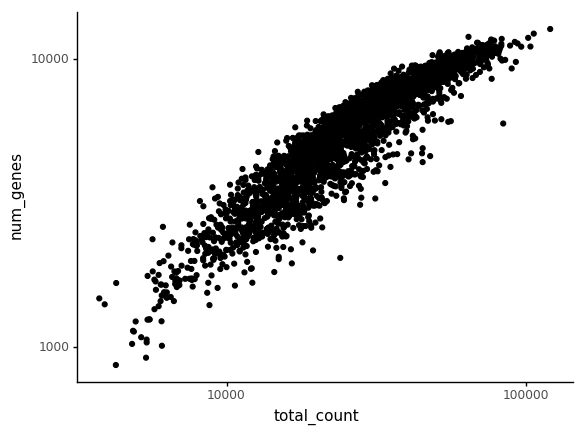

<ggplot: (-9223371913433316885)>

In [6]:
p.qplot('total_count', 'num_genes', sample_info, log='xy') + p.theme_classic()

In [7]:
path = '~/Google Drive/Research Projects/Finished/Power-analysis/Public data/SRP045452/genes.tsv'
gene_info = pd.read_csv(path, index_col=0, header=-1, names=['name'])

In [8]:
gene_info['mean_'] = counts.mean(1).values

In [9]:
gene_info['var_'] = counts.var(1).values

In [10]:
gene_info['is_spike'] = gene_info.index.str.startswith('ERCC-')

In [11]:
gene_info.dtypes

mean_       float64
var_        float64
is_spike       bool
dtype: object

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\scales\scale.py:483: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


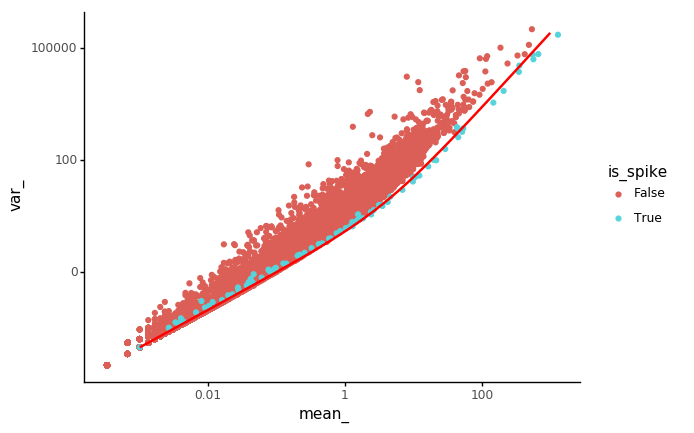

<ggplot: (123348030135)>

In [12]:
xx = np.logspace(-3, 3)
yy = xx + 0.25 * xx ** 2
tmp = pd.DataFrame({'x': xx, 'y': yy})

p.qplot('mean_', 'var_', gene_info, color='is_spike', log='xy') + p.theme_classic() \
    + p.geom_line(p.aes('x', 'y'), tmp, color='red', size=1)

In [13]:
gene_info['fracdrop'] = (1 - (counts > 1).sum(1) / counts.shape[1]).values

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\scales\scale.py:483: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


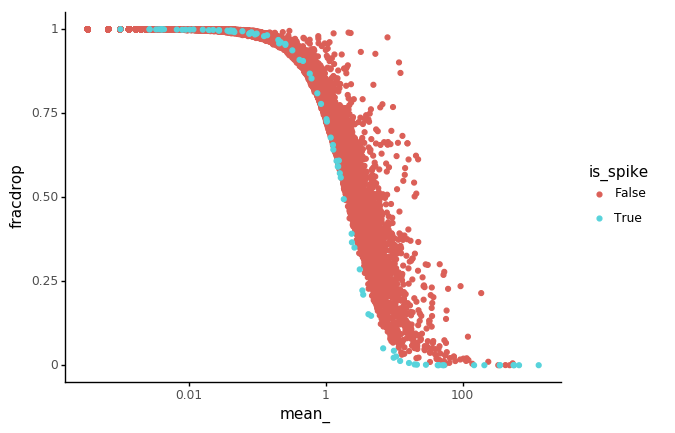

<ggplot: (-9223371913507497177)>

In [14]:
p.qplot('mean_', 'fracdrop', gene_info, log='x', color='is_spike') + p.theme_classic()

In [15]:
idx = counts.pipe(np.log1p).var(1).sort_values(ascending=False).index[:200]

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [17]:
pca = PCA(n_components=2)

In [18]:
Y = pca.fit_transform(counts.loc[idx].T.pipe(np.log1p))

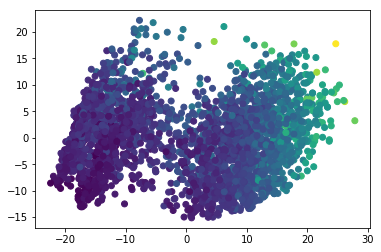

In [19]:
plt.scatter(*Y.T, c=sample_info.total_count);

In [20]:
pca = PCA(n_components=5)

In [21]:
Y = pca.fit_transform(scale(counts.loc[idx].T.pipe(np.log1p)))

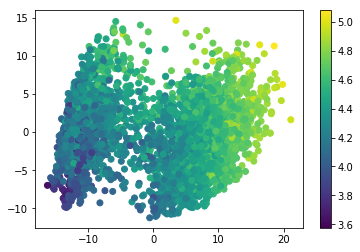

In [22]:
plt.scatter(Y[:,0], Y[:,1], c=np.log10(sample_info.total_count));
plt.colorbar();

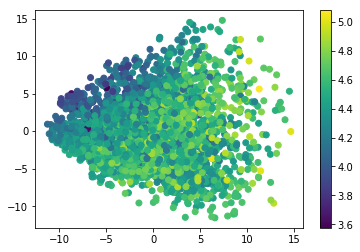

In [23]:
plt.scatter(Y[:,1], Y[:,2], c=np.log10(sample_info.total_count));
plt.colorbar();

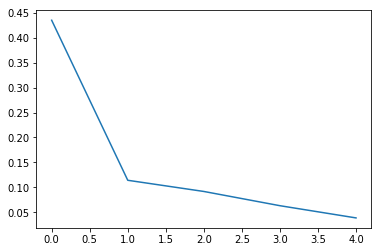

In [24]:
plt.plot(pca.explained_variance_ratio_);

In [25]:
np.argsort(Y[:, 0])

array([2148,  564,  206, ..., 2787, 2493, 2802], dtype=int64)

In [26]:
counts.loc[idx, np.argsort(Y[:, 0])]

,2148,564,206,1238,540,856,522,1252,386,681,...,2830,2133,1507,2255,2174,2222,2213,2787,2493,2802
8363,332,441,340,482,231,388,302,301,422,280,...,1,5,23,21,11,5,7,1,7,2
24184,0,0,0,0,0,0,0,0,0,0,...,47,156,1262,181,377,425,197,485,48,155
3024,0,0,0,0,0,1,0,0,0,3,...,226,120,693,96,184,173,99,193,721,198
28296,0,0,0,0,0,0,0,0,0,0,...,132,59,42,73,403,159,210,87,253,260
9052,23,51,31,6,68,82,39,68,1,13,...,0,0,3,0,0,0,0,1,1,0
6090,45,46,29,41,13,25,31,26,4,43,...,0,0,0,1,1,0,0,0,0,0
12710,0,0,0,0,0,0,0,0,0,0,...,31,67,973,95,201,319,85,252,26,92
12574,0,0,0,0,0,0,0,0,0,0,...,21,56,866,70,171,242,72,210,23,67
39391,0,1,0,0,0,0,0,0,0,1,...,152,210,1873,357,417,887,263,656,214,360
6022,0,0,0,0,0,1,2,0,0,0,...,128,123,101,332,151,45,68,116,172,182


In [27]:
tmp = _

In [28]:
l_idx = np.argsort(pca.components_[0])

In [29]:
l_idx

array([ 28,   4,  15,  12,  43,   5,  10,  29,   0,  57,  13,  83, 161,
        81, 160,  64, 197, 178,  14,  74, 189,  45,  72, 191, 121, 143,
       105, 163, 155, 182, 112, 124,  69, 126, 118, 127, 138, 175, 198,
       129, 144, 154, 195,  78, 152,  62,  86, 168,  40,  75, 166,  82,
        19, 101,  36,  22, 131,  59,  60,  58,   1, 180,  85,  80,  37,
       134, 171,   7, 107,   6,  65, 149,  50,  61, 110,  16,  21,  44,
       145,  26, 172,   8, 184, 176,  90, 177, 111, 164,  77, 169,  87,
       135,  76,  97, 179,  96, 104, 102, 170,  33,  38,  95, 141, 122,
        52, 103,   3,  27, 150,  51, 139, 190, 148, 196, 192, 187,  94,
       193, 156, 157,  39, 199, 128,  73,  92, 158,  63, 117,  55, 120,
       125, 165,  91, 130,  93, 153, 167, 119, 183,  23,  18, 162,   2,
       142,  42, 109,  17, 185, 159,  34, 113,  89, 132,  54, 123, 106,
       116, 181,  47,  35, 137, 133,  20, 194, 114,  41,  99,  68, 186,
       174,  49,  98, 146, 173, 147,  48,  70, 151,  88, 140,   

In [30]:
l_tmp = np.log1p(tmp)

In [31]:
l_tmp.shape

(200, 3005)

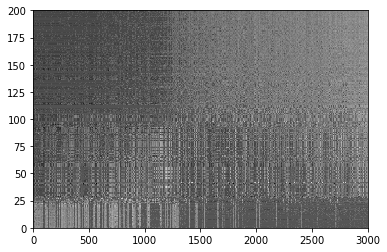

In [32]:
plt.pcolormesh(scale(l_tmp.iloc[l_idx], 1), cmap=cm.gray);

In [54]:
idx = counts.pipe(np.log1p).var(1).sort_values(ascending=False).index[:3000]

In [55]:
t_counts = counts.iloc[idx].copy().pipe(np.log1p)

In [56]:
t_counts['gene'] = t_counts.index.argsort()

In [57]:
t_counts.melt(id_vars='gene', var_name='cell', value_name='expression').to_csv('zeisel_sample_long.csv')

In [58]:
t_counts_long = t_counts.melt(id_vars='gene', var_name='cell', value_name='expression')

In [59]:
t_counts_long.shape

(9015000, 3)

C:\Users\vale\Anaconda3\lib\site-packages\plotnine\scales\scale.py:483: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)


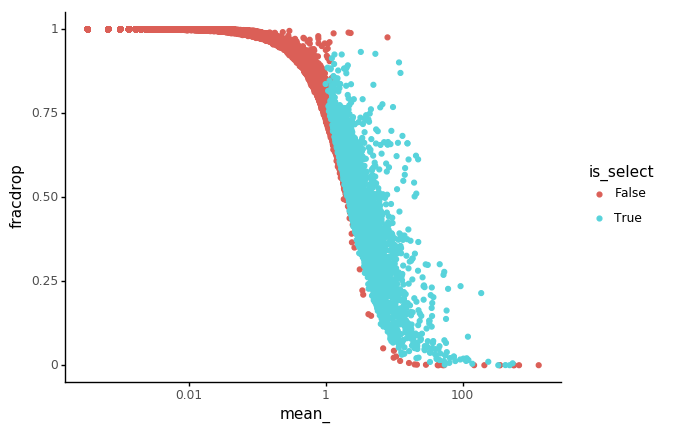

<ggplot: (-9223371913507332534)>

In [60]:
gene_info['is_select'] = False
gene_info.loc[gene_info.index[idx], 'is_select'] = True

p.qplot('mean_', 'fracdrop', gene_info, log='x', color='is_select') + p.theme_classic()

In [61]:
pca = PCA(n_components=2)

In [62]:
Y = pca.fit_transform(t_counts.drop('gene', 1).T)

In [63]:
Y.shape

(3005, 2)

In [70]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

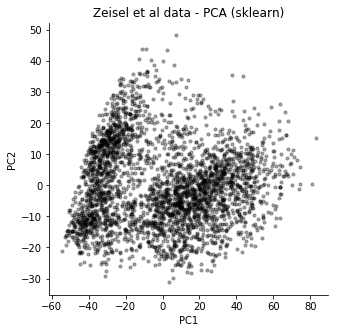

In [74]:
figsize(5, 5)
plt.scatter(Y[:, 0], Y[:, 1], s=10, alpha=0.33, c='k')
plt.title('Zeisel et al data - PCA (sklearn)')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [47]:
t_counts = counts.iloc[idx].copy()

In [48]:
total_df = pd.DataFrame({'cell': t_counts.columns, 'total_count': counts.sum(0)})

In [49]:
t_counts['gene'] = t_counts.index.argsort()
t_counts_long = t_counts.melt(id_vars='gene', var_name='cell', value_name='expression')

In [50]:
tmp = t_counts_long.merge(total_df, on='cell')
tmp.to_csv('zeisel_sample_long_counts.csv')
tmp.head()

,gene,cell,expression,total_count
0,109,0,401,13538
1,106,0,17,13538
2,105,0,2,13538
3,146,0,5,13538
4,177,0,25,13538


In [51]:
t_counts_long.shape

(601000, 3)